### Decision Tree 

Decision Tree (DT) is a supervised learning method used for classification and regression.


Classification trees are used when dependent variable is categorical


Regression trees are used when dependent variable is continuous


The goal of a decision tree is to split our data into groups such that every element in one group belongs to the same category.

<img src='images/dt.PNG' width='60%' height='60%' />

<img src='images/dt2.PNG' />

### An Important concept is how informative a split of data is..

<img src='images/dt3.PNG' width='80%' height='80%' />

<img src='images/gini.png'/>

### There are number of mathematical ways to compute the best split ..

### but widely used method is Gini index

### So decision tree algorithm starts by finding the feature that leads to the most informative split

<img src='images/dt4.PNG' width='80%' height='80%' />

<img src='images/dt5.PNG' width='80%' height='80%'/>

In [ ]:
# Gini Impurity
# Fruit Basket (All apples) - label apple - 0

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

### Prepare data

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

### Split Data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.20,
                                            random_state=1)

### Build Model

In [6]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction

In [19]:
print(iris.target_names)
p=dt.predict(xtest)

['setosa' 'versicolor' 'virginica']


In [22]:
import numpy as np
np.where(ytest != p)

(array([22], dtype=int64),)

### Evaluation

In [7]:
print("Training Score: ",dt.score(xtrain,ytrain))
print("Testing Score: ",dt.score(xtest,ytest))

Training Score:  1.0
Testing Score:  0.9666666666666667


### So here we can say our model is overfitted..,

Decision trees may get overfitted when they produce large, complicated decision trees that perfectly fit every training instance but fail to generalize the real relationship or unseen data


Pruning is a technique in machine learning that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

<img src='images/dt6.PNG' width='80%' height='80%'/>

### Feature Importance

<img src="images/f1.png">

In [10]:
dt.feature_importances_

array([0.        , 0.03133487, 0.57201197, 0.39665316])

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
import pandas as pd

In [13]:
pd.Series(dt.feature_importances_,index=iris.feature_names).plot(kind="barh")

### How to plot a decision tree?

### Installation and Setup

- pip install graphviz
- pip install pydotplus

- Download Graphviz https://graphviz.gitlab.io/_pages/Download/Download_windows.html (.msi file)
- (Next > Only me > Yes)
- Go to C > ProgramFiles(x86) >Graphviz2.38 > bin folder and copy path.
- This PC (right click) > Properties > Advance System Settings.
- Click on Environment Variables > Path > Edit >New > (Paste path) > Ok
Restart your computer

### Visualization of tree

In [14]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

In [15]:
dot_data = export_graphviz(dt,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          rounded=True,
                          filled=True)

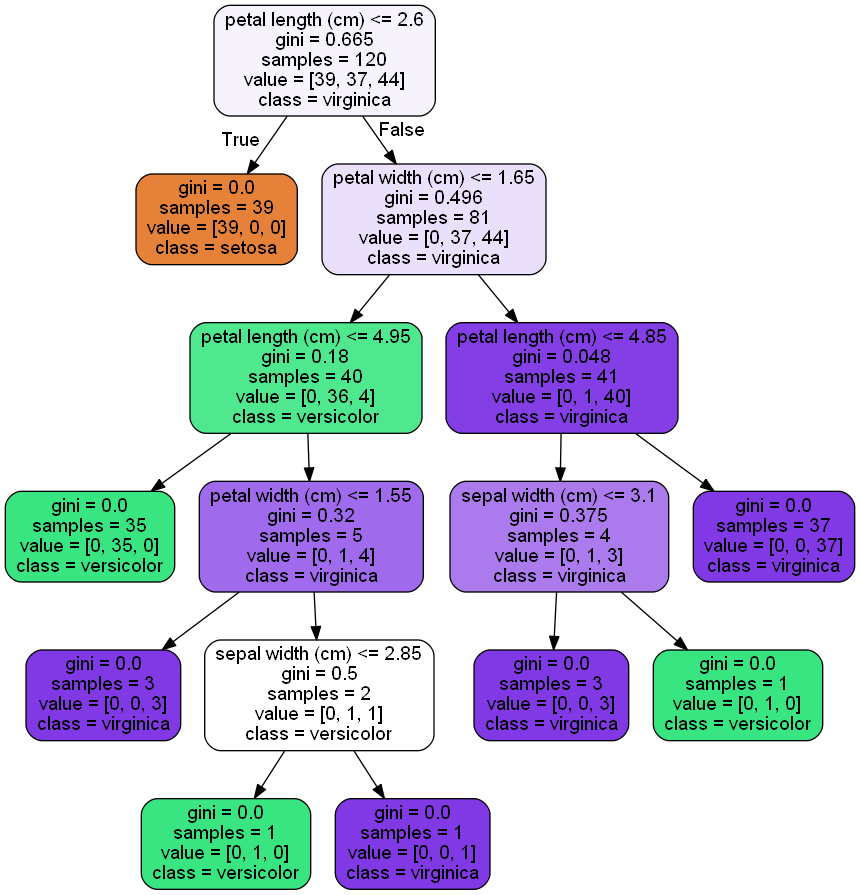

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())